# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Conclusion
As expected, the temperature reach to the highest point at the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer than the northern hemisphere.
There is no strong relationship between latitude and cloudiness. However, it is absorbing to see that the intensity becomes much higher at 0, 80, and 100% cloudiness.
There is no strong relationship between latitude and wind speed. However, most cities in this dataset are windless with less than 10 mph of wind.

In [5]:
pip install citipy

    100% |████████████████████████████████| 563kB 6.7MB/s ta 0:00:011
  Stored in directory: /Users/ivysss/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



In [12]:
# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | punta alta
Processing Record 4 of Set 1 | chara
Processing Record 5 of Set 1 | salalah
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | husavik
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | cabedelo
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | unai
Processing Record 13 of Set 1 | lavrentiya
Processing Record 14 of Set 1 | khandyga
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | bathsheba
Processing Record 17 of Set 1 | tongren
Processing Record 18 of Set 1 | tilichiki
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | labuhan
Processing Record 22 of Set 1 | sinkat
City not found. Skipping...
Pro

Processing Record 34 of Set 4 | bajil
Processing Record 35 of Set 4 | tasiilaq
Processing Record 36 of Set 4 | opuwo
Processing Record 37 of Set 4 | nueva helvecia
Processing Record 38 of Set 4 | tura
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | balgazyn
Processing Record 41 of Set 4 | coihaique
Processing Record 42 of Set 4 | touros
Processing Record 43 of Set 4 | flinders
Processing Record 44 of Set 4 | kruisfontein
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | alvand
Processing Record 47 of Set 4 | vardo
Processing Record 48 of Set 4 | filingue
Processing Record 49 of Set 4 | huarmey
Processing Record 0 of Set 5 | zhigansk
Processing Record 1 of Set 5 | pangody
Processing Record 2 of Set 5 | cabo san lucas
Processing Record 3 of Set 5 | aksay
Processing Record 4 of Set 5 | leh
Processing Record 5 of Set 5 | roma
Processing Record 6 of Set 5 | pacific grove
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 |

Processing Record 27 of Set 8 | chongwe
Processing Record 28 of Set 8 | rio grande
Processing Record 29 of Set 8 | west bay
Processing Record 30 of Set 8 | pinega
Processing Record 31 of Set 8 | korla
City not found. Skipping...
Processing Record 32 of Set 8 | rehnan
Processing Record 33 of Set 8 | owen sound
Processing Record 34 of Set 8 | indramayu
Processing Record 35 of Set 8 | thinadhoo
Processing Record 36 of Set 8 | namibe
Processing Record 37 of Set 8 | yar-sale
Processing Record 38 of Set 8 | kalabo
Processing Record 39 of Set 8 | fort wellington
Processing Record 40 of Set 8 | tuatapere
Processing Record 41 of Set 8 | oistins
Processing Record 42 of Set 8 | bakel
Processing Record 43 of Set 8 | talgar
Processing Record 44 of Set 8 | lompoc
Processing Record 45 of Set 8 | isangel
Processing Record 46 of Set 8 | qandala
Processing Record 47 of Set 8 | rocha
Processing Record 48 of Set 8 | lengshuitan
Processing Record 49 of Set 8 | matamoros
Processing Record 0 of Set 9 | delta

Processing Record 8 of Set 12 | vila
Processing Record 9 of Set 12 | birjand
Processing Record 10 of Set 12 | warqla
City not found. Skipping...
Processing Record 11 of Set 12 | apad
Processing Record 12 of Set 12 | milingimbi
City not found. Skipping...
Processing Record 13 of Set 12 | solnechnyy
Processing Record 14 of Set 12 | cassilandia
Processing Record 15 of Set 12 | orichi
Processing Record 16 of Set 12 | bagdarin
Processing Record 17 of Set 12 | morehead
Processing Record 18 of Set 12 | dicabisagan
Processing Record 19 of Set 12 | grafenau
Processing Record 20 of Set 12 | kachug
Processing Record 21 of Set 12 | hami
Processing Record 22 of Set 12 | egvekinot
Processing Record 23 of Set 12 | ambon
Processing Record 24 of Set 12 | shaunavon
Processing Record 25 of Set 12 | vestmannaeyjar
Processing Record 26 of Set 12 | scalloway
City not found. Skipping...
Processing Record 27 of Set 12 | abong mbang
Processing Record 28 of Set 12 | teahupoo
Processing Record 29 of Set 12 | map

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [23]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,0,PF,1574783068,73,-9.80,-139.03,78.94,13.78
1,dikson,100,RU,1574783068,96,73.51,80.55,1.62,4.23
2,punta alta,90,AR,1574783069,100,-27.46,-55.82,73.40,5.82
3,chara,20,GR,1574783069,76,39.42,22.43,59.00,5.82
4,salalah,40,OM,1574783069,69,17.01,54.10,80.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

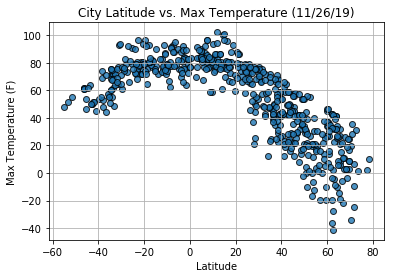

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

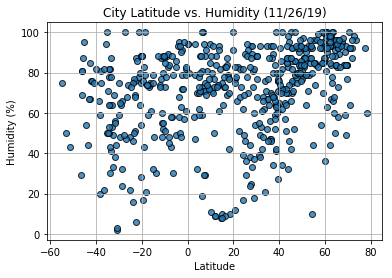

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

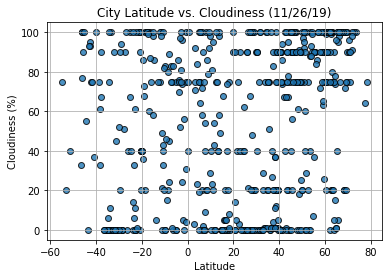

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

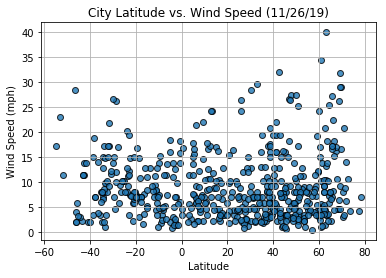

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()